<a href="https://colab.research.google.com/github/justin-bennington/S2ML-Music-Composer/blob/main/S2ML_Music_Composer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Forked from:
##### [Co-compose with OpenAI Jukebox](https://colab.research.google.com/drive/1iFX5uYi7zqMzAisvBTsB68LQJWjDrgco)


#**S2ML Music Composer**
####An interface for OpenAI Jukebox which allows users to co-compose music with AI, primarily focusing on sample continuation using VQ-VAE.




# **Setup**


In [1]:
#@title Run this cell to connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
#@title Parameters
import wave
import contextlib
import os 
from pathlib import Path

import os
PROJECT_DIRECTORY = 'S2ML_MUSIC_GENERATOR' #@param {type:"string"}
path_tmp = '/content/gdrive/MyDrive/{PROJECT_DIRECTORY}/'
if not os.path.exists(path_tmp):
        os.mkdir(path_tmp)


WAV = '/content/S.wav' #@param {type:"string"}
ARTIST= 'tool' #@param ['10 years', '10cc', '112', '14 bis', '16 volt', '2', '2 chainz', '2 live crew', '2 unlimited', '2pac', '2raumwohnung', '3 doors down', '311', '36 crazyfists', '38 special', '4him', '5 seconds of summer', '50 cent', '54 40', '7 seconds', '77s', '8ball mjg', '99 posse', 'a day to remember', 'a ha', 'a r rahman', 'a tribe called quest', 'aaron carter', 'aaron copland', 'aaron neville', 'aaron tippin', 'aaron watson', 'abba', 'abbey lincoln', 'abc', 'abel pintos', 'abney park', 'above beyond', 'abw rts', 'ac dc', 'acappella', 'accept', 'ace frehley', 'ace of base', 'acid drinkers', 'ada band', 'adam ant', 'adam faith', 'adam green', 'adam lambert', 'adam sandler', 'adolf busch', 'adrian belew', 'adriana calcanhotto', 'adriano celentano', 'aerosmith', 'aesop rock', 'afi', 'afrojack', 'after all', 'afterhours', 'against me', 'agathocles', 'agnetha f ltskog', 'agnostic front', 'agonoize', 'agoraphobic nosebleed', 'ahmet kaya', 'aiden', 'aimee mann', 'air', 'air supply', 'ajda pekkan', 'akon', 'al bano', 'al bano romina power', 'al green', 'al jarreau', 'al jolson', 'al martino', 'al stewart', 'alabama', 'alacranes musical', 'alain chamfort', 'alan jackson', 'alan stivell', 'alanis morissette', 'albert collins', 'albert king', 'alberto cortez', 'alborosie', 'alceu valen a', 'alcione', 'alejandra guzm n', 'alejandro escovedo', 'alejandro fern ndez', 'alejandro lerner', 'alejandro sanz', 'aleks syntek', 'alesana', 'alessandro scarlatti', 'alex ubago', 'alexis fido', 'alexz johnson', 'alfred cortot', 'ali project', 'alice', 'alice cooper', 'alice in chains', 'alicia de larrocha', 'alicia keys', 'aline barros', 'alison krauss', 'alison krauss union station', 'alison moyet', 'aliz e', 'alkaline trio', 'all', 'all 4 one', 'all about eve', 'all saints', 'all that remains', 'all time low', 'allison crowe', 'allison moorer', 'alma gluck', 'alpha blondy', 'alphaville', 'altan', 'alton ellis', 'alunni del sole', 'alvin lee', 'am lia rodrigues', 'amado batista', 'amanda miguel', 'amanda palmer', 'america', 'american music club', 'amon amarth', 'amon d l ii', 'amorphis', 'amos lee', 'amplifier', 'amr diab', 'amy grant', 'an na', 'ana bel n', 'ana carolina', 'ana gabriel', 'ana moura', 'anastacia', 'anathema', 'anberlin', 'and one', 'and you will know us by the trail of dead', 'andr hazes', 'andr previn', 'andr s calamaro', 'andr s schiff', 'andrea bocelli', 'andrew bird', 'andrew lloyd webber', 'andrew peterson', 'andrew w k', 'andromeda', 'andy partridge', 'andy russell', 'andy williams', 'ane brun', 'ang lica', 'angel', 'angelo badalamenti', 'angelo branduardi', 'angie stone', 'angra', 'angus julia stone', 'ani difranco', 'animal collective', 'anna maria jopek', 'anna oxa', 'anna ternheim', 'anne clark', 'anne grete preus', 'anne murray', 'anne sophie mutter', 'anner bylsma', 'annie lennox', 'annihilator', 'anthony hamilton', 'anthony phillips', 'anthrax', 'anti flag', 'anton n dvo k', 'antonio carlos jobim', 'antonio meneses', 'antonio vivaldi', 'antony and the johnsons', 'anvil', 'aphex twin', 'apocalyptica', 'apologetix', 'apoptygma berzerk', 'april wine', 'apulanta', 'ara ketu', 'arab strap', 'arabesque', 'arc ngel', 'arcade fire', 'arcana', 'arcangelo corelli', 'architects', 'archive', 'arctic monkeys', 'arena', 'aretha franklin', 'ariana grande', 'ariel pink', 'arlo guthrie', 'armand van helden', 'armia', 'armin van buuren', 'armored saint', 'arnaldo antunes', 'arno', 'art garfunkel', 'arthur grumiaux', 'arthur h', 'arthur rubinstein', 'artie shaw', 'artillery', 'artrosis', 'artur schnabel', 'arturo benedetti michelangeli', 'arty', 'as i lay dying', 'as marcianas', 'asa', 'asa de guia', 'ash', 'ashanti', 'asia', 'asian kung fu generation', 'asleep at the wheel', 'asp', 'asphyx', 'assalti frontali', 'assemblage 23', 'astrud gilberto', 'aswad', 'atb', 'aterciopelados', 'atlantic starr', 'atmosphere', 'atomic kitten', 'atreyu', 'atrocity', 'attila', 'audio adrenaline', 'august burns red', 'augustus pablo', 'autopsy', 'avantasia', 'avatar', 'avenged sevenfold', 'aventura', 'avi es do forr', 'aviators', 'avicii', 'avril lavigne', 'avulsed', 'axel rudi pell', 'axelle red', 'axxis', 'ayreon', 'ayumi hamasaki', 'az', 'b b king', 'b hse onkelz', 'b j thomas', 'b la bart k', 'b o b', 'b z', 'babas nicos', 'babbie mason', 'baby bash', 'babyface', 'babyshambles', 'back number', 'backstreet boys', 'backyard babies', 'bad boys blue', 'bad company', 'bad religion', 'badfinger', 'badly drawn boy', 'bahh tee', 'bajm', 'bananarama', 'banco del mutuo soccorso', 'banda bassotti', 'banda calypso', 'banda eva', 'bap', 'bar man o', 'bar o vermelho', 'barbara', 'barbara mandrell', 'barbra streisand', 'barclay james harvest', 'barenaked ladies', 'barricada', 'barrington levy', 'barry louis polisar', 'barry manilow', 'barry white', 'basement jaxx', 'basshunter', 'bassi maestro', 'bassnectar', 'bathory', 'bauhaus', 'bay city rollers', 'bayside', 'beach house', 'beardfish', 'beastie boys', 'beat crusaders', 'beatsteaks', 'beau', 'beaux arts trio', 'bebo norman', 'beck', 'bed ich smetana', 'bee gees', 'beenie man', 'behemoth', 'belinda', 'belinda carlisle', 'bell x1', 'bella morte', 'belle and sebastian', 'belphegor', 'ben bernie', 'ben e king', 'ben folds', 'ben folds five', 'ben harper', 'ben lee', 'benito di paula', 'benjamin britten', 'benny benassi', 'benny goodman', 'benny neyman', 'beres hammond', 'berlin', 'bernard lavilliers', 'bersuit vergarabat', 'bert jansch', 'bessie smith', 'beth carvalho', 'beth hart', 'beth nielsen chapman', 'beth orton', 'bethel music', 'betontod', 'bette midler', 'better than ezra', 'bettie serveert', 'betty hutton', 'between the buried and me', 'beyonc', 'beyonc ', 'big audio dynamite', 'big big train', 'big bill broonzy', 'big country', 'big d and the kids table', 'big head todd and the monsters', 'big joe turner', 'big mama thornton', 'big sean', 'big sugar', 'big tymers', 'bijelo dugme', 'bill anderson', 'bill haley his comets', 'bill monroe', 'bill nelson', 'bill withers', 'billie holiday', 'billy bragg', 'billy currington', 'billy eckstine', 'billy fury', 'billy gilman', 'billy idol', 'billy j kramer the dakotas', 'billy joe royal', 'billy joe shaver', 'billy joel', 'billy jones ernest hare', 'billy murray', 'billy ocean', 'billy preston', 'billy ray cyrus', 'billy s band', 'billy squier', 'billy talent', 'billy vaughn', 'bing crosby', 'biohazard', 'biquini cavad o', 'birth control', 'bizzy bone', 'bj rk', 'bj rn afzelius', 'bj rn eidsv g', 'bj rn rosenstr m', 'bj rn ulvaeus benny andersson', 'bl f', 'black flag', 'black label society', 'black moth super rainbow', 'black rebel motorcycle club', 'black sabbath', 'black stone cherry', 'black uhuru', 'black veil brides', 'blackfoot', 'blackmore s night', 'blackstreet', 'blake shelton', 'blasterjaxx', 'blaze bayley', 'bleeding through', 'blind blake', 'blind boy fuller', 'blind guardian', 'blind lemon jefferson', 'blind willie mctell', 'blindside', 'blink 182', 'blitzkid', 'bloc party', 'blonde redhead', 'blondie', 'blood on the dance floor', 'blood sweat tears', 'blue', 'blue cheer', 'blue october', 'blue rodeo', 'blue stahli', 'blue system', 'blue yster cult', 'blues traveler', 'blumentopf', 'blur', 'blutengel', 'bo diddley', 'boa', 'boards of canada', 'bob crosby', 'bob dylan', 'bob marley', 'bob marley the wailers', 'bob mould', 'bob rivers', 'bob seger', 'bobbie gentry', 'bobby bare', 'bobby bland', 'bobby brown', 'bobby darin', 'bobby goldsboro', 'bobby o', 'bobby rydell', 'bobby v', 'bobby vee', 'bobby vinton', 'bobby womack', 'bodeans', 'body count', 'bodyjar', 'bolt thrower', 'bomb the music industry', 'bon jovi', 'bonanza banzai', 'bone thugs n harmony', 'boney m', 'boney m ', 'bonfire', 'bonnie raitt', 'bonnie tyler', 'booker t the mg s', 'borknagar', 'boston', 'boswell sisters', 'boudewijn de groot', 'bow wow', 'bowling for soup', 'boy george', 'boyce avenue', 'boysetsfire', 'boyz ii men', 'boyzone', 'boz scaggs', 'bracket', 'brad paisley', 'brainstorm', 'brand new', 'brandi carlile', 'brandy', 'brazzaville', 'bread', 'breaking benjamin', 'brenda lee', 'brentalfloss', 'brian eno', 'brian hyland', 'brian mcknight', 'brian setzer', 'brian wilson', 'bride', 'bright eyes', 'bring me the horizon', 'british sea power', 'britney spears', 'brockhampton', 'broilers', 'broken social scene', 'bronco', 'brook benton', 'brooks dunn', 'brotha lynch hung', 'brown eyed girls', 'brownie mcghee', 'bruce cockburn', 'bruce dickinson', 'bruce hornsby', 'bruce springsteen', 'bruna karla', 'brunner brunner', 'bruno marrone', 'bruno mars', 'bryan adams', 'bryan ferry', 'bt', 'bts', 'buck 65', 'buck owens', 'buck tick', 'buckcherry', 'buddy clark', 'buddy guy', 'buddy holly', 'budgie', 'buffy sainte marie', 'building 429', 'buitres', 'buju banton', 'bukka white', 'bullet for my valentine', 'bumblefoot', 'bun b', 'bunbury', 'bunny wailer', 'burl ives', 'burning heads', 'burning spear', 'burt bacharach', 'burton cummings', 'burzum', 'bush', 'bushido', 'busta rhymes', 'butch walker', 'butthole surfers', 'buzzcocks', 'c line dion', 'c murder', 'c ssia eller', 'cab calloway', 'cadena perpetua', 'caedmon s call', 'caetano veloso', 'caf tacvba', 'cage', 'cage the elephant', 'cake', 'calexico', 'caliban', 'callejon', 'calogero', 'calvin harris', 'cam ron', 'camel', 'camilo sesto', 'camper van beethoven', 'can', 'cancerslug', 'candan er etin', 'candlemass', 'canibus', 'canned heat', 'cannibal corpse', 'caparezza', 'capercaillie', 'capital inicial', 'capleton', 'captain beefheart and the magic band', 'captain tennille', 'car seat headrest', 'caravan', 'carbon leaf', 'carcass', 'carlos gardel', 'carly simon', 'carman', 'carmen consoli', 'carmen mcrae', 'carole king', 'carpenters', 'carrie newcomer', 'carrie underwood', 'carter family', 'carter the unstoppable sex machine', 'cass mccombs', 'cassandra wilson', 'casting crowns', 'cat power', 'cat stevens', 'cathedral', 'catherine wheel', 'catie curtis', 'catupecu machu', 'cave in', 'cece winans', 'cee lo green', 'celia cruz', 'celldweller', 'celph titled', 'celtic thunder', 'celtic woman', 'cem adrian', 'centinex', 'ces ria vora', 'chaka khan', 'chakuza', 'chamillionaire', 'charles aznavour', 'charles harrison', 'charles trenet', 'charley pride', 'charlie barnet', 'charlie brown jr', 'charlie daniels', 'charlie landsborough', 'charlie louvin', 'charlie musselwhite', 'charlie patton', 'charlie peacock', 'charlie rich', 'charlotte church', 'charlotte martin', 'cheap trick', 'cheek', 'chenoa', 'cher', 'cherry poppin daddies', 'cheryl cole', 'chet atkins', 'chevelle', 'chic', 'chicago', 'chiclete com banana', 'chico buarque', 'childish gambino', 'children of bodom', 'china crisis', 'chingy', 'chit ozinho xoror', 'chris brown', 'chris cornell', 'chris de burgh', 'chris isaak', 'chris knight', 'chris lake', 'chris ledoux', 'chris rea', 'chris tomlin', 'chris young', 'christian bautista', 'christina aguilera', 'christoph eschenbach', 'christopher cross', 'chrystian ralf', 'chubby checker', 'chuck berry', 'chumbawamba', 'ciara', 'cidade negra', 'cilla black', 'circa survive', 'circle jerks', 'city and colour', 'cl', 'clan of xymox', 'clannad', 'clara haskil', 'clarence gatemouth brown', 'claris', 'claude debussy', 'claudio arrau', 'claudio baglioni', 'claudio rocchi', 'clawfinger', 'clay aiken', 'clay walker', 'cledus t judd', 'cliff edwards', 'cliff richard', 'clifford t ward', 'clint black', 'clint mansell', 'closterkeller', 'club 8', 'club dogo', 'clueso', 'clutch', 'clyde mcphatter', 'cmx', 'co', 'cocoa tea', 'cocorosie', 'cocteau twins', 'coheed and cambria', 'coil', 'colbie caillat', 'cold chisel', 'cold war kids', 'coldplay', 'colin blunstone', 'colin hay', 'colin james', 'collective soul', 'collie buddz', 'collin raye', 'color me badd', 'coma', 'combichrist', 'common', 'con funk shun', 'concrete blonde', 'conjunto primavera', 'connee boswell', 'connie francis', 'connie smith', 'conor oberst', 'converge', 'conway twitty', 'conway twitty loretta lynn', 'coolio', 'copeland', 'corb lund', 'corey hart', 'corrosion of conformity', 'corvus corax', 'count basie', 'countess', 'counting crows', 'country joe mcdonald', 'covenant', 'cowboy junkies', 'cows', 'cpm 22', 'cracker', 'cradle of filth', 'craig david', 'crash test dummies', 'creed', 'creedence clearwater revival', 'cri cri', 'cristian castro', 'cristiano ara jo', 'cristina branco', 'cro', 'crosby stills nash', 'cross canadian ragweed', 'crowded house', 'cruachan', 'crystal gayle', 'crystal kay', 'crystal lewis', 'cuby blizzards', 'cuisillos', 'culture', 'culture club', 'current 93', 'cursive', 'curtis mayfield', 'curve', 'cyndi lauper', 'cypress hill', 'd a d', 'd espairsray', 'd f c', 'd r i', 'd12', 'da t r u t h', 'dada', 'daddy yankee', 'daft punk', 'dagoba', 'dalida', 'damian marley', 'damien jurado', 'dan fogelberg', 'dan seals', 'dana winner', 'dance gavin dance', 'daniel', 'daniel amos', 'daniel johnston', 'daniel lanois', 'daniel lavoie', 'daniel m ller schott', 'daniel o donnell', 'daniel shafran', 'daniela mercury', 'danielson', 'danko jones', 'danny elfman', 'danzig', 'dar williams', 'dargen d amico', 'darius rucker', 'dark moor', 'dark sanctuary', 'dark tranquillity', 'darkest hour', 'darkseed', 'darkthrone', 'darlene zschech', 'daryl hall', 'dashboard confessional', 'daughtry', 'dave alvin', 'dave clark five', 'dave davies', 'dave dudley', 'dave edmunds', 'dave matthews band', 'david allan coe', 'david and the giants', 'david bisbal', 'david bowie', 'david byrne', 'david cassidy', 'david crosby', 'david crowder band', 'david demar a', 'david essex', 'david garrett', 'david geringas', 'david gray', 'david guetta', 'david knopfler', 'david leb n', 'david lee roth', 'david meece', 'david oistrakh', 'david rovics', 'david sylvian', 'david usher', 'david wilcox', 'dc talk', 'de dijk', 'de jeugd van tegenwoordig', 'de la soul', 'de palmas', 'de vision', 'deacon blue', 'dead can dance', 'dead kennedys', 'deadmau5', 'dean martin', 'deana carter', 'death angel', 'death cab for cutie', 'death grips', 'death in june', 'debbie gibson', 'debby boone', 'deborah cox', 'deen', 'deep purple', 'deer tick', 'deerhoof', 'deerhunter', 'def con dos', 'def leppard', 'deftones', 'degarmo and key', 'deichkind', 'deicide', 'deine lakaien', 'del amitri', 'del shannon', 'delbert mcclinton', 'delirious', 'deliverance', 'delroy wilson', 'delta goodrem', 'demi lovato', 'demis roussos', 'demon', 'demon hunter', 'deniece williams', 'dennis brown', 'deorro', 'depeche mode', 'descendents', 'desmond dekker', 'destiny s child', 'destroyer', 'destruction', 'dethklok', 'devendra banhart', 'devildriver', 'devin townsend', 'devin townsend project', 'devo', 'dew scented', 'diamond rio', 'diana krall', 'diana ross', 'dianne reeves', 'diary of dreams', 'dick annegarn', 'dick haymes', 'diddy', 'dido', 'die fantastischen vier', 'die flippers', 'die happy', 'die krupps', 'die prinzen', 'die rzte', 'die toten hosen', 'dierks bentley', 'dimmu borgir', 'dinah shore', 'dinah washington', 'dino ciani', 'dinosaur jr', 'dinu lipatti', 'dio', 'dion', 'dionne warwick', 'diorama', 'diplo', 'dir en grey', 'dire straits', 'dirty heads', 'dirty projectors', 'disciple', 'disclosure', 'distemper', 'disturbed', 'dith piaf', 'dixie chicks', 'dizzee rascal', 'dj gruff', 'dj khaled', 'dj shadow', 'dj snake', 'djavan', 'dmitri shostakovich', 'dmx', 'do as infinity', 'doa', 'doc watson', 'dog fashion disco', 'dogwood', 'dokken', 'dolly parton', 'dom no', 'don backy', 'don carlos', 'don cornell', 'don diablo', 'don francisco', 'don gibson', 'don mclean', 'don williams', 'donguralesko', 'donna summer', 'donny osmond', 'donovan', 'dope', 'doris day', 'doro', 'dottie west', 'dougie maclean', 'dover', 'dr alimantado', 'dr dog', 'dr dre', 'dr feelgood', 'dr hook the medicine show', 'dr john', 'draco rosa', 'dragonforce', 'drake', 'dream', 'dream evil', 'dream theater', 'dreamtale', 'dritte wahl', 'drive by truckers', 'dropkick murphys', 'drowning pool', 'duane eddy', 'duelo', 'duke ellington', 'dulce pontes', 'duncan dhu', 'duncan sheik', 'duran duran', 'dusty springfield', 'dwight yoakam', 'dying fetus', 'e 40', 'e nomine', 'e rotic', 'eagles', 'earl hooker', 'earth wind fire', 'ebnem ferah', 'echo the bunnymen', 'echolyn', 'ed bruce', 'ed harcourt', 'ed sheeran', 'eddi reader', 'eddie cantor', 'eddie fisher', 'eddie from ohio', 'eddie kendricks', 'eddie money', 'eddie rabbitt', 'eddy arnold', 'eddy chen', 'eddy grant', 'eddy howard', 'edenbridge', 'edge of sanity', 'edguy', 'editors', 'edoardo bennato', 'edvard grieg', 'edwin fischer', 'edwin starr', 'edwyn collins', 'edyta g rniak', 'eek a mouse', 'eels', 'eighteen visions', 'einst rzende neubauten', 'eisbrecher', 'eisregen', 'ektomorf', 'el chapo de sinaloa', 'el cuarteto de nos', 'el kel iset', 'el ltimo ke zierre', 'elbow', 'electric light orchestra', 'electric six', 'electric wizard', 'element of crime', 'eleni mandell', 'elephant man', 'elevation worship', 'elf power', 'elis regina', 'elisa', 'ella fitzgerald', 'ella mae morse', 'ellie goulding', 'elliott smith', 'ellis paul', 'elmore james', 'eloy', 'elton john', 'eluveitie', 'elvenking', 'elvis costello', 'elvis costello the attractions', 'elvis presley', 'elysian fields', 'embrace', 'emerson lake palmer', 'emil ana torrini', 'emil gilels', 'emilie autumn', 'emilio navaira', 'eminem', 'emma', 'emmerson nogueira', 'emmure', 'emmylou harris', 'en vogue', 'engelbert humperdinck', 'engenheiros do hawaii', 'enigma', 'ennio morricone', 'enrico caruso', 'enrico ruggeri', 'enrique iglesias', 'ensiferum', 'enslaved', 'enter shikari', 'entombed', 'enuff z nuff', 'epica', 'epmd', 'eppu normaali', 'erasmo carlos', 'erasure', 'eric bibb', 'eric carmen', 'eric church', 'eric clapton', 'eric donaldson', 'eric johnson', 'eric prydz', 'erick sermon', 'erik satie', 'ernest tubb', 'eros ramazzotti', 'erskine hawkins', 'erste allgemeine verunsicherung', 'erykah badu', 'escape the fate', 'esham', 'espinoza paz', 'estampie', 'esther ofarim', 'ethel waters', 'etta james', 'eugenio bennato', 'eugenio finardi', 'europe', 'eurythmics', 'eva cassidy', 'evanescence', 'eve', 'everclear', 'evergrey', 'everlast', 'every time i die', 'everything but the girl', 'evgeny kissin', 'exaltasamba', 'example', 'exciter', 'exodus', 'extreme', 'eyeshine', 'ezginin g nl', 'f lix leclerc', 'fabolous', 'fabrizio de andr', 'face to face', 'faf de bel m', 'fagner', 'fairport convention', 'faith evans', 'faith hill', 'faith no more', 'faithless', 'falco', 'falconer', 'fall out boy', 'falling up', 'farben lehre', 'faron young', 'fat joe', 'fatboy slim', 'fates warning', 'fats domino', 'fats waller', 'faun', 'faust o', 'faz l say', 'fear factory', 'fedde le grand', 'federico salvatore', 'feeder', 'felix mendelssohn bartholdy', 'ferdi tayfur', 'ferlin husky', 'fernando ortega', 'fernando sorocaba', 'ferry corsten', 'fettes brot', 'feuerschwanz', 'ffh', 'fiddler s green', 'fidel rueda', 'field music', 'fifteen', 'fifth harmony', 'fightstar', 'filter', 'finger eleven', 'finntroll', 'fiorello', 'firewater', 'firewind', 'fish', 'fishbone', 'fito p ez', 'five finger death punch', 'five iron frenzy', 'flame', 'flatt scruggs', 'fleetwood mac', 'fletcher henderson', 'flo rida', 'florence the machine', 'florent pagny', 'florida georgia line', 'flume', 'flying lotus', 'flyleaf', 'foetus', 'foghat', 'foo fighters', 'fool s garden', 'foreigner', 'fountains of wayne', 'four tops', 'four year strong', 'fr d ric chopin', 'fran oise hardy', 'france gall', 'francesco de gregori', 'francesco guccini', 'francis cabrel', 'francis poulenc', 'franco battiato', 'frank black and the catholics', 'frank boeijen', 'frank crumit', 'frank ifield', 'frank sinatra', 'frank turner', 'frank zappa', 'frankie avalon', 'frankie carle', 'frankie j', 'frankie laine', 'frankie valli', 'frankie vaughan', 'frankjavcee', 'franz ferdinand', 'franz liszt', 'franz schubert', 'freak kitchen', 'fred astaire', 'fred buscaglione', 'fred eaglesmith', 'freddie hart', 'freddie king', 'freddie mcgregor', 'freedom call', 'frei wild', 'frenzal rhomb', 'fresno', 'frightened rabbit', 'fritz kreisler', 'fronda', 'front 242', 'front line assembly', 'fu manchu', 'fugazi', 'fun lovin criminals', 'fun people', 'funeral for a friend', 'funkadelic', 'funker vogt', 'funny van dannen', 'furry lewis', 'fury in the slaughterhouse', 'future', 'g ksel', 'g lben ergen', 'g rard manset', 'g unit', 'gabriel o pensador', 'gabriella ferri', 'gabrielle', 'gackt', 'gaelic storm', 'gaetano donizetti', 'gaither vocal band', 'gal costa', 'galactic cowboys', 'galija', 'gamma ray', 'gang of four', 'gang starr', 'garbage', 'garnet crow', 'garnett silk', 'garrick ohlsson', 'garth brooks', 'gary allan', 'gary glitter', 'gary lewis the playboys', 'gary moore', 'gary numan', 'gary stewart', 'gary u s bonds', 'ge aleksandersen', 'gene austin', 'gene autry', 'gene chandler', 'gene clark', 'gene krupa', 'gene pitney', 'gene vincent', 'gene watson', 'genesis', 'gentle giant', 'gentleman', 'geoff moore', 'georg kreisler', 'georg philipp telemann', 'george benson', 'george clinton', 'george formby', 'george frideric handel', 'george gershwin', 'george harrison', 'george jones', 'george lam', 'george michael', 'george strait', 'george thorogood the destroyers', 'georges bizet', 'georges brassens', 'georges cziffra', 'georges moustaki', 'georgia gibbs', 'gerald levert', 'gerald moore', 'gerhard sch ne', 'gerry rafferty', 'gerry the pacemakers', 'geto boys', 'ghostface killah', 'giacomo puccini', 'gian giovani', 'gian marco', 'gianmaria testa', 'gianna nannini', 'gianni morandi', 'gidon kremer', 'gigi', 'gigi d agostino', 'gigi d alessio', 'gigliola cinquetti', 'gil scott heron', 'gil shaham', 'gilbert b caud', 'gilbert o sullivan', 'gilberto gil', 'gilberto gilmar', 'gilberto santa rosa', 'ginette reno', 'gino vannelli', 'ginuwine', 'gioacchino rossini', 'giorgio gaber', 'gipsy kings', 'girls aloud', 'girls generation', 'girlschool', 'giuni russo', 'giuseppe verdi', 'gladys knight the pips', 'glay', 'glee cast', 'glen campbell', 'glen gray and the casa loma orchestra', 'glenn frey', 'glenn gould', 'glenn hughes', 'glenn miller', 'globe', 'gloria estefan', 'gloria gaynor', 'gnr', 'god module', 'godsmack', 'goethes erben', 'golden earring', 'goldfinger', 'goldfrapp', 'gomez', 'gondwana', 'goo goo dolls', 'good charlotte', 'good riddance', 'goodie mob', 'gordon bok', 'gordon jenkins', 'gordon lightfoot', 'gordon macrae', 'gorillaz', 'gotthard', 'gov t mule', 'grace jones', 'graham coxon', 'gramatik', 'grand funk railroad', 'grandaddy', 'grant lee phillips', 'grateful dead', 'grave', 'grave digger', 'graveworm', 'great big sea', 'great white', 'greeley estates', 'green day', 'greg brown', 'gregg allman', 'gregor piatigorsky', 'gregorian', 'gregory isaacs', 'grigory sokolov', 'grimskunk', 'grinspoon', 'grits', 'groundation', 'grupo bryndis', 'guano apes', 'guardian', 'guided by voices', 'guilherme arantes', 'guiomar novaes', 'guns n roses', 'gus arnheim', 'gustav mahler', 'gustavo cerati', 'guster', 'guus meeuwis', 'guy b art', 'guy clark', 'guy lombardo and his royal canadians', 'guy mitchell', 'guy sebastian', 'gwar', 'gwen stefani', 'gym class heroes', 'gyptian', 'h blockx', 'h kan hellstr m', 'h sker d', 'h sker d ', 'haemorrhage', 'halestorm', 'half man half biscuit', 'half pint', 'halford', 'hall oates', 'hamelen', 'hamlet', 'hammerfall', 'hank locklin', 'hank snow', 'hank thompson', 'hank williams', 'hank williams iii', 'hank williams jr', 'hank williams jr ', 'hannes wader', 'hanoi rocks', 'hans zimmer', 'hanson', 'hanzel und gretyl', 'hardcore superstar', 'hardwell', 'harem scarem', 'harold melvin the blue notes', 'harry belafonte', 'harry chapin', 'harry connick jr', 'harry gregson williams', 'harry james', 'harry nilsson', 'haste the day', 'hate', 'hatebreed', 'haujobb', 'hawk nelson', 'hawksley workman', 'hawkwind', 'hawthorne heights', 'hayden', 'hayley westenra', 'headhunterz', 'heart', 'heather alexander', 'heather dale', 'heather nova', 'heaven shall burn', 'hed p e', 'hedley', 'heideroosjes', 'heinrich schiff', 'heinz rudolf kunze', 'helen forrest', 'helen reddy', 'helena vondr kov', 'helene fischer', 'helium vola', 'hellbillies', 'helloween', 'helmet', 'helstar', 'henri salvador', 'henri tachan', 'henry burr', 'henry mancini', 'henryk szeryng', 'herb alpert', 'herbert gr nemeyer', 'herbie hancock', 'herman brood', 'herman s hermits', 'herman van veen', 'hevisaurus', 'hey', 'hilary duff', 'hildegard knef', 'hillsong', 'hilltop hoods', 'him', 'hitomi', 'hocico', 'hole', 'hollywood undead', 'hombres g', 'hoobastank', 'hoodoo gurus', 'horace andy', 'hot chip', 'hot chocolate', 'hot dad', 'hot water music', 'house of lords', 'howard jones', 'howard shore', 'howlin wolf', 'hubert sumlin', 'huddie william ledbetter', 'hugues aufray', 'hunters collectors', 'huntingtons', 'hyde', 'hypocrisy', 'i brahim tatl ses', 'i gufi', 'i muvrini', 'i n karaca', 'ian anderson', 'ian brown', 'ian hunter', 'ian thomas', 'ice cube', 'ice t', 'iced earth', 'icehouse', 'idlewild', 'iggy azalea', 'iggy pop', 'ignacy jan paderewski', 'igor stravinsky', 'ijahman levi', 'ike tina turner', 'ill ni o', 'illapu', 'illuminate', 'ilse delange', 'imagine dragons', 'immortal technique', 'impaled nazarene', 'in extremo', 'in flames', 'in strict confidence', 'in this moment', 'incantation', 'incubus', 'india arie', 'indica', 'indigo girls', 'indochine', 'infected mushroom', 'information society', 'ingrid michaelson', 'inme', 'inna', 'inner circle', 'insane clown posse', 'inspiral carpets', 'instalok', 'inti illimani', 'intocable', 'inxs', 'iona brown', 'iq', 'ira', 'iration', 'irene cara', 'irene grandi', 'iris dement', 'iron fire', 'iron maiden', 'iron wine', 'isaac hayes', 'ismo alanko', 'israel houghton', 'israel vibration', 'itzhak perlman', 'iu', 'iva zanicchi', 'ivan graziani', 'ivan lins', 'ivan moravec', 'ivano fossati', 'ivete sangalo', 'izzy stradlin', 'j b lenoir', 'j b o', 'j cole', 'j geils band', 'j j cale', 'j karjalainen', 'ja rule', 'jacek kaczmarski', 'jack bruce', 'jack greene', 'jack johnson', 'jack savoretti', 'jack scott', 'jack white', 'jackie evancho', 'jackie wilson', 'jackson 5', 'jackson browne', 'jacob miller', 'jacques bertin', 'jacques brel', 'jacques higelin', 'jag panzer', 'jagged edge', 'jaguares', 'jah cure', 'jake owen', 'james', 'james blunt', 'james brown', 'james cotton', 'james horner', 'james mcmurtry', 'james newton howard', 'james taylor', 'jamey johnson', 'jamie cullum', 'jamiroquai', 'jan dean', 'jan garber', 'jandek', 'jane air', 'jane birkin', 'jane monheit', 'jane s addiction', 'janet jackson', 'janis ian', 'janis joplin', 'jann arden', 'jarom r nohavica', 'jars of clay', 'jascha heifetz', 'jason aldean', 'jason derulo', 'jason mraz', 'javier sol s', 'jay chou', 'jay jay johanson', 'jay sean', 'jay the americans', 'jay z', 'jean ferrat', 'jean leloup', 'jean michel jarre', 'jean shepard', 'jedi mind tricks', 'jeff beck', 'jeff buckley', 'jeff healey', 'jefferson airplane', 'jefferson starship', 'jenifer', 'jenni rivera', 'jennifer lopez', 'jennifer rush', 'jens lekman', 'jeremy camp', 'jermaine jackson', 'jerry butler', 'jerry goldsmith', 'jerry jeff walker', 'jerry lee lewis', 'jerry reed', 'jerry rivera', 'jerusalem', 'jesse mccartney', 'jessica simpson', 'jessie j', 'jesus culture', 'jethro tull', 'jewel', 'jhen aiko', 'jill scott', 'jill sobule', 'jim brickman', 'jim croce', 'jim ed brown', 'jim jones', 'jim reeves', 'jimi hendrix', 'jimmie lunceford', 'jimmie rodgers', 'jimmy buffett', 'jimmy cliff', 'jimmy dean', 'jimmy dorsey', 'jimmy eat world', 'jimmy reed', 'jimmy rogers', 'jimmy rushing', 'jimmy wakely', 'jls', 'jo o bosco', 'jo o paulo daniel', 'jo stafford', 'jo vally', 'joan armatrading', 'joan baez', 'joan jett', 'joan jett and the blackhearts', 'joan manuel serrat', 'joan of arc', 'joan osborne', 'joan sebastian', 'joaqu n sabina', 'jodeci', 'jody watley', 'joe', 'joe bonamassa', 'joe budden', 'joe cocker', 'joe diffie', 'joe ely', 'joe henry', 'joe jackson', 'joe nichols', 'joe purdy', 'joe satriani', 'joe simon', 'joe tex', 'joe walsh', 'johann sebastian bach', 'johannes brahms', 'john anderson', 'john browning', 'john cale', 'john denver', 'john entwistle', 'john farnham', 'john fogerty', 'john frusciante', 'john hammond', 'john hiatt', 'john holt', 'john lee hooker', 'john legend', 'john lennon', 'john martyn', 'john mayall', 'john mayer', 'john mccormack', 'john mellencamp', 'john michael montgomery', 'john miles', 'john ogdon', 'john powell', 'john prine', 'john stewart', 'john waite', 'john wesley harding', 'john wetton', 'john williams', 'johnnie ray', 'johnnie taylor', 'johnny cash', 'johnny copeland', 'johnny desmond', 'johnny hallyday', 'johnny horton', 'johnny long', 'johnny marvin', 'johnny mathis', 'johnny mercer', 'johnny nash', 'johnny paycheck', 'johnny rivers', 'johnny tillotson', 'johnny winter', 'joint venture', 'jojo', 'jokke', 'jolin tsai', 'jon anderson', 'jon secada', 'jonas brothers', 'jonatha brooke', 'jonathan coulton', 'joni james', 'joni mitchell', 'jonny lang', 'jordin sparks', 'jorge ben', 'jorge bolet', 'jorn', 'jos afonso', 'jos augusto', 'jos feliciano', 'jos luis rodr guez', 'josef suk', 'joseph arthur', 'joseph haydn', 'joseph szigeti', 'josh garrels', 'josh groban', 'josh ritter', 'josh rouse', 'josh turner', 'josh woodward', 'joshua bell', 'joss stone', 'jota quest', 'journey', 'joy division', 'joy electric', 'joyce', 'juan gabriel', 'juan luis guerra', 'juana molina', 'juanes', 'judas priest', 'judie tzuke', 'judy collins', 'judy garland', 'juelz santana', 'juice leskinen', 'juice newton', 'julian lennon', 'julian lloyd webber', 'juliana hatfield', 'juliane werding', 'julie doiron', 'julien clerc', 'julieta venegas', 'juliette gr co', 'julio iglesias', 'jump5', 'june carter cash', 'jungle rot', 'junior reid', 'junior wells', 'junkies', 'justin bieber', 'justin timberlake', 'justin townes earle', 'k d lang', 'k i z', 'k k', 'k paz de la sierra', 'k rbholz', 'k s choice', 'k3', 'kaaris', 'kaiser chiefs', 'kaizers orchestra', 'kalmah', 'kamelot', 'kansas', 'kanye west', 'karel kryl', 'kargo', 'kari peitsamo', 'karyn white', 'kasabian', 'kasey chambers', 'kaskade', 'kat tun', 'kataklysm', 'katatonia', 'kate anna mcgarrigle', 'kate bush', 'kate nash', 'kate rusby', 'kate smith', 'katerine', 'katharine mcphee', 'katherine jenkins', 'katia guerreiro', 'katie melua', 'katy perry', 'kay kyser', 'kay starr', 'kazik', 'kc the sunshine band', 'keane', 'keb mo', 'keb mo ', 'keith sweat', 'keith urban', 'keith whitley', 'kelis', 'kelly clarkson', 'kelly price', 'ken boothe', 'ken hensley', 'kendrick lamar', 'kenny chesney', 'kenny g', 'kenny loggins', 'kenny rogers', 'kenny wayne shepherd', 'kent', 'kenza farah', 'keren ann', 'keri hilson', 'kesha', 'kevin coyne', 'kevin devine', 'kevin max', 'kid abelha', 'kid cudi', 'kid rock', 'kidz bop', 'kill hannah', 'killing joke', 'killswitch engage', 'kim carnes', 'kim mitchell', 'kim wilde', 'king crimson', 'king diamond', 'king gizzard the lizard wizard', 'king missile', 'king s x', 'king tubby', 'kingdom come', 'kings of leon', 'kirk franklin', 'kirsty maccoll', 'kisp l s a borz', 'kiss', 'kitty wells', 'kj 52', 'klaus badelt', 'klaus hoffmann', 'kmfdm', 'knorkator', 'koda kumi', 'kodak black', 'koko taylor', 'kollegah', 'konstantin wecker', 'kontra k', 'kool keith', 'kool savas', 'kool the gang', 'korn', 'korpiklaani', 'kotiteollisuus', 'kotoko', 'kraan', 'kraftwerk', 'krayzie bone', 'kreator', 'kris allen', 'kris kristofferson', 'krisiun', 'kristin hersh', 'krs one', 'ksu', 'kt tunstall', 'kula shaker', 'kult', 'kumikameli', 'kurupt', 'kutless', 'ky mani marley', 'kylie minogue', 'l a guns', 'l arc en ciel', 'l me immortelle', 'l o c', 'l o ferr', 'l vi', 'la arrolladora banda el lim n', 'la barranca', 'la beriso', 'la bottine souriante', 'la firma', 'la habitaci n roja', 'la ley', 'la mafia', 'la oreja de van gogh', 'la polla records', 'la renga', 'la toya jackson', 'la vela puerca', 'labv l gais tips', 'labyrinth', 'lacrimas profundere', 'lacrimosa', 'lacuna coil', 'lady antebellum', 'lady gaga', 'ladytron', 'lagwagon', 'laibach', 'laidback luke', 'lamb', 'lamb of god', 'lambchop', 'lana del rey', 'lana lane', 'lando fiorini', 'lang lang', 'lao che', 'lara fabian', 'larry carlton', 'larry clinton', 'larry norman', 'lars winnerb ck', 'las pastillas del abuelo', 'las pelotas', 'latino', 'laura branigan', 'laura fygi', 'laura marling', 'laura pausini', 'laurent voulzy', 'laurie anderson', 'laveerre', 'lawrence welk', 'lazar berman', 'le n gieco', 'le orme', 'le ther strip', 'lea salonga', 'lead belly', 'leandro leonardo', 'leann rimes', 'leatherface', 'leaves eyes', 'lech janerka', 'lecrae', 'led zeppelin', 'lee aaron', 'lee ann womack', 'lee greenwood', 'lee hazlewood', 'lee scratch perry', 'leehom wang', 'leevi and the leavings', 'lefty frizzell', 'legi o urbana', 'leif ove andsnes', 'lena horne', 'lena park', 'lenny kravitz', 'leny escudero', 'leo jaime', 'leo jan ek', 'leo reisman', 'leo sayer', 'leon fleisher', 'leon russell', 'leona lewis', 'leonard bernstein', 'leonard cohen', 'leonard pennario', 'leonard rose', 'leonardo', 'leonid kogan', 'les baxter', 'les brown', 'les cowboys fringants', 'les fatals picards', 'les paul', 'les rita mitsouko', 'les wampas', 'lesley gore', 'less than jake', 'letzte instanz', 'level 42', 'levon helm', 'lifehouse', 'lightnin hopkins', 'lightning seeds', 'lil boosie', 'lil flip', 'lil keke', 'lil kim', 'lil wayne', 'lil yachty', 'lily allen', 'limp bizkit', 'linda ronstadt', 'lindisfarne', 'linkin park', 'linton kwesi johnson', 'linval thompson', 'lio', 'lionel hampton', 'lionel richie', 'lisa', 'lisa ekdahl', 'lisa germano', 'lisa gerrard', 'lisa loeb', 'lisa stansfield', 'lit', 'lita ford', 'little big town', 'little mix', 'little richard', 'little river band', 'little walter', 'live', 'living colour', 'living sacrifice', 'liz phair', 'll cool j', 'lloyd price', 'llu s llach', 'lmfao', 'lob o', 'lobo', 'local h', 'logic', 'lonestar', 'lonnie donegan', 'lonnie johnson', 'lonnie mack', 'lord belial', 'lord of the lost', 'lordi', 'lords of acid', 'loreena mckennitt', 'loretta lynn', 'lorrie morgan', 'los aut nticos decadentes', 'los bukis', 'los cafres', 'los campesinos', 'los chalchaleros', 'los fabulosos cadillacs', 'los lobos', 'los palominos', 'los pericos', 'los rancheros', 'los straitjackets', 'los temerarios', 'los tigres del norte', 'los tres', 'los tucanes de tijuana', 'lost dogs', 'lostprophets', 'lou rawls', 'lou reed', 'loudon wainwright iii', 'louis armstrong', 'louis jordan', 'louis lortie', 'louis prima', 'love and rockets', 'love solfege', 'luca barbarossa', 'lucero', 'lucinda williams', 'lucio dalla', 'lucky dube', 'lucybell', 'ludacris', 'ludwig van beethoven', 'luigi tenco', 'luis alberto spinetta', 'luis fonsi', 'luis miguel', 'luiz gonzaga', 'luka bloom', 'luke bryan', 'lulu', 'lulu santos', 'luna', 'lupe fiasco', 'luther allison', 'luther vandross', 'lyfe jennings', 'lyle lovett', 'lynn anderson', 'lynyrd skynyrd', 'm a', 'm go de oz', 'm m', 'm nchener freiheit', 'm nia', 'm o morta', 'm pokora', 'm tley cr e', 'm ward', 'm83', 'ma rainey', 'maanam', 'maaya sakamoto', 'mac davis', 'mac miller', 'macabre', 'macaco', 'machinae supremacy', 'machine gun kelly', 'machine head', 'macklemore ryan lewis', 'macy gray', 'mad caddies', 'madeleine peyroux', 'madness', 'madonna', 'madredeus', 'madrugada', 'maggie reilly', 'magic sam', 'magic slim', 'magnum', 'magnus uggla', 'mai kuraki', 'majesty', 'major lazer', 'mal', 'malcolm holcombe', 'malevolent creation', 'malicorne', 'malvina reynolds', 'man', 'mancha de rolando', 'manchester orchestra', 'mando diao', 'mandy moore', 'manfred mann', 'manfred mann s earth band', 'mango', 'manic street preachers', 'manowar', 'mantus', 'manu chao', 'mara maravilha', 'marc almond', 'marc anthony', 'marc cohn', 'marc lavoine', 'marcella bella', 'marcelle meyer', 'marcia griffiths', 'marco antonio sol s', 'marduk', 'margaret whiting', 'margot the nuclear so and so s', 'maria beth nia', 'maria jo o pires', 'maria mena', 'maria muldaur', 'maria rita', 'mariah carey', 'marie fredriksson', 'marie lafor t', 'marillion', 'marilyn manson', 'marina and the diamonds', 'marina lima', 'mario', 'mario lanza', 'mario venuti', 'marion harris', 'marisa monte', 'marissa nadler', 'marius m ller westernhagen', 'mariza', 'mark chesnutt', 'mark erelli', 'mark heard', 'mark knopfler', 'mark kozelek', 'mark lanegan', 'mark ronson', 'markus schulz', 'marlene dietrich', 'maroon 5', 'martha and the vandellas', 'martha argerich', 'martha wainwright', 'martin carthy', 'martina mcbride', 'marty robbins', 'marvin gaye', 'marvin gaye tammi terrell', 'mary j blige', 'mary mary', 'mary wells', 'masami okui', 'mason jennings', 'mass hysteria', 'massimo bubola', 'massimo ranieri', 'massive attack', 'masta ace', 'master p', 'mastodon', 'mat kearney', 'matanza', 'matchbox twenty', 'mathieu chedid', 'matia bazar', 'matisyahu', 'matt haimovitz', 'matt maher', 'matt nathanson', 'matt pond pa', 'matt redman', 'matthew good', 'matthew ryan', 'matthew sweet', 'maureen mcgovern', 'maurice ravel', 'maurizio pollini', 'mavis staples', 'max gazz', 'max mo park', 'max romeo', 'maxi priest', 'maxime le forestier', 'mayday', 'mayday parade', 'mc chris', 'mc eiht', 'mc frontalot', 'mc hammer', 'mc solaar', 'mcfly', 'me first and the gimme gimmes', 'meat loaf', 'meat puppets', 'mecano', 'medi val b bes', 'medina azahara', 'meek mill', 'megadeth', 'megaherz', 'mel tillis', 'mel torm', 'melanie', 'melanie c', 'melissa etheridge', 'melissa manchester', 'melotron', 'melvins', 'memphis may fire', 'memphis minnie', 'memphis slim', 'men without hats', 'menudo', 'mercedes sosa', 'mercury rev', 'mercyful fate', 'mercyme', 'merle haggard', 'meshell ndegeocello', 'meshuggah', 'metal church', 'metallica', 'method man', 'metric', 'mew', 'mewithoutyou', 'mgmt', 'mia martini', 'michael bolton', 'michael bubl', 'michael card', 'michael franks', 'michael jackson', 'michael johnson', 'michael learns to rock', 'michael martin murphey', 'michael mcdonald', 'michael nesmith', 'michael rabin', 'michael rose', 'michael schenker group', 'michael w smith', 'michel berger', 'michel fugain', 'michel jonasz', 'michel polnareff', 'michele zarrillo', 'mickey gilley', 'mickey newbury', 'midnight oil', 'midnite', 'mietta', 'migos', 'miguel bos', 'mijares', 'mika', 'mikael wiehe', 'mike doughty', 'mike jones', 'mike oldfield', 'mike the mechanics', 'mikel erentxun', 'mikey dread', 'mikhail pletnev', 'mildred bailey', 'miley cyrus', 'milie simon', 'milk inc', 'millencolin', 'milton nascimento', 'milva', 'mina', 'mind in a box', 'mindless self indulgence', 'minist rio koinonya de louvor', 'ministry', 'mint condition', 'minus the bear', 'mirah', 'miranda lambert', 'misanthrope', 'misfits', 'miss may i', 'mississippi fred mcdowell', 'mississippi john hurt', 'missy elliott', 'mitch miller', 'mobb deep', 'moby', 'modern talking', 'modest mouse', 'modest petrovich mussorgsky', 'mohsen namjoo', 'molly hatchet', 'molotov', 'monica', 'monkey majik', 'mono inc', 'monster magnet', 'montell jordan', 'montgomery gentry', 'monty python', 'moonlight', 'moonspell', 'morbid angel', 'morcheeba', 'morgan heritage', 'morgana lefay', 'mormon tabernacle choir', 'morrissey', 'mortification', 'mos def', 'mose allison', 'mostly autumn', 'mot rhead', 'mother mother', 'motion city soundtrack', 'motorpsycho', 'mott the hoople', 'moxy fr vous', 'moya brennan', 'mr big', 'mr children', 'mr vegas', 'mud', 'muddy waters', 'mudhoney', 'mudvayne', 'municipal waste', 'murray perahia', 'murs', 'muse', 'mushroomhead', 'musiq soulchild', 'mustafa sandal', 'mustasch', 'mutabaruka', 'mutemath', 'mxpx', 'my chemical romance', 'my life with the thrill kill kult', 'my morning jacket', 'myl ne farmer', 'myra hess', 'mystic prophecy', 'mystikal', 'n e r d', 'na o zumbi', 'nacho vegas', 'nachtmahr', 'nada', 'namie amuro', 'nana mouskouri', 'nanci griffith', 'nancy sinatra', 'nancy wilson', 'nando reis', 'napalm death', 'nara le o', 'nas', 'nat king cole', 'nat shilkret', 'natalia lafourcade', 'natalie cole', 'natalie grant', 'natalie imbruglia', 'natalie merchant', 'natalino otto', 'natasha bedingfield', 'natasha st pier', 'natewantstobattle', 'nathan milstein', 'natiruts', 'nazareth', 'ne yo', 'neal morse', 'necro', 'needtobreathe', 'neffa', 'neil diamond', 'neil sedaka', 'neil young', 'nek', 'neko case', 'nekromantix', 'nektar', 'nellie mckay', 'nelly', 'nelly furtado', 'nelson', 'nelson freire', 'nena', 'nenhum de n s', 'neoton fam lia', 'nerina pallot', 'neurosis', 'never shout never', 'nevermore', 'new edition', 'new found glory', 'new kids on the block', 'new model army', 'new order', 'new riders of the purple sage', 'new trolls', 'new york philharmonic', 'news', 'newsboys', 'ney matogrosso', 'ni a pastori', 'nic jones', 'nick cave and the bad seeds', 'nick drake', 'nick lowe', 'nick lucas', 'nickelback', 'nicki minaj', 'nicky romero', 'nicole', 'nicole scherzinger', 'night ranger', 'nightmare', 'nightrage', 'nightwish', 'nik kershaw', 'nikka costa', 'nil fer', 'nile', 'nilsson', 'nina hagen', 'nina simone', 'nine inch nails', 'ninja sex party', 'nino d angelo', 'nirvana', 'nitty gritty dirt band', 'no doubt', 'no fun at all', 'no l coward', 'no te va gustar', 'no use for a name', 'noa', 'nocturnal rites', 'nofx', 'noir d sir', 'nomeansno', 'nonpoint', 'norah jones', 'norma jean', 'nouvelle vague', 'nox arcana', 'nsync', 'nuclear assault', 'nunslaughter', 'nuova compagnia di canto popolare', 'o a r', 'o rappa', 'o s t r', 'oasis', 'obie trice', 'obk', 'ocean colour scene', 'odair jos', 'odetta', 'of montreal', 'oficina g3', 'ohio players', 'ohl', 'oingo boingo', 'okkervil river', 'ol dirty bastard', 'ola magnell', 'old 97 s', 'olivia', 'olivia newton john', 'olivia newton john john travolta', 'olly murs', 'omega', 'omnia', 'omul cu obolani', 'one direction', 'one ok rock', 'onerepublic', 'oomph', 'opeth', 'opus', 'orbital', 'orchestral manoeuvres in the dark', 'origa', 'os mutantes', 'os paralamas do sucesso', 'otep', 'otis redding', 'otis rush', 'otis spann', 'otto dix', 'our lady peace', 'our last night', 'outkast', 'ov7', 'over the rhine', 'overkill', 'ovidi montllor', 'owl city', 'ozzy osbourne', 'p m dawn', 'p nk', 'p o d', 'pablo casals', 'pain', 'pain of salvation', 'paluch', 'pam tillis', 'panda', 'panic at the disco', 'pansy division', 'pantera', 'papa roach', 'paradise lost', 'paragon', 'paramore', 'parazi ii', 'parkway drive', 'parliament', 'parni valjak', 'parokya ni edgar', 'parov stelar', 'parry gripp', 'pascal rog ', 'passenger', 'pat benatar', 'pat boone', 'pathology', 'pato banton the reggae revol', 'pato fu', 'patrick bruel', 'patsy cline', 'patti labelle', 'patti page', 'patty griffin', 'patty loveless', 'patty pravo', 'paul and storm', 'paul anka', 'paul brunelle', 'paul carrack', 'paul gilbert', 'paul kalkbrenner', 'paul kelly', 'paul mccartney', 'paul oakenfold', 'paul revere the raiders', 'paul simon', 'paul specht', 'paul tortelier', 'paul van dyk', 'paul wall', 'paul weller', 'paul westerberg', 'paul weston', 'paul whiteman', 'paul wilbur', 'paul williams', 'paul young', 'paula fernandes', 'paulinho moska', 'pavement', 'peabo bryson', 'peaches herb', 'pearl jam', 'peggy lee', 'peggy march', 'pendragon', 'pennywise', 'pentatonix', 'pepper', 'per gessle', 'percy faith', 'pere ubu', 'perry como', 'pesado', 'pet shop boys', 'pete seeger', 'pete townshend', 'pete yorn', 'peter and the test tube babies', 'peter andre', 'peter frampton', 'peter gabriel', 'peter gordon', 'peter green', 'peter green splinter group', 'peter hammill', 'peter murphy', 'peter paul mary', 'peter serkin', 'peter tosh', 'peter wolf', 'petra', 'petula clark', 'phantom planet', 'pharrell williams', 'phil collins', 'phil harris', 'phil keaggy', 'phil ochs', 'phil wickham', 'philadelphia orchestra', 'philip glass', 'philippe entremont', 'phillips craig dean', 'phish', 'piebald', 'pierre bachelet', 'pierre fournier', 'pierre lapointe', 'pierre laurent aimard', 'piersi', 'pieter wispelwey', 'pig', 'pig destroyer', 'pinback', 'pink cream 69', 'pink floyd', 'pippo pollina', 'pitbull', 'pitchshifter', 'pixies', 'pj harvey', 'placebo', 'plain white t s', 'planetshakers', 'plumb', 'poco', 'poets of the fall', 'poison', 'polysics', 'pop will eat itself', 'popeda', 'porcupine tree', 'porta', 'porter wagoner', 'portugal the man', 'powderfinger', 'powerman 5000', 'powerwolf', 'pr ta v tra', 'prefab sprout', 'premiata forneria marconi', 'pretenders', 'primal fear', 'primal scream', 'primus', 'prince', 'prince buster', 'prinz pi', 'pro pain', 'procol harum', 'professor longhair', 'project 86', 'project pat', 'project pitchfork', 'prong', 'propagandhi', 'przemys aw gintrowski', 'psalmen voor nu', 'psyche', 'psychostick', 'public enemy', 'public image ltd', 'puddle of mudd', 'puffy amiyumi', 'puhdys', 'pulp', 'punchline', 'punkreas', 'pur', 'pyhimys', 'pyotr ilyich tchaikovsky', 'qntal', 'quartetto cetra', 'quasi', 'queen', 'queens of the stone age', 'queensr che', 'quiet riot', 'quietdrive', 'quilapay n', 'r e m', 'r e m ', 'r kelly', 'r l burnside', 'r yksopp', 'r3hab', 'ra a negra', 'racoon', 'radiohead', 'radu lupu', 'raekwon', 'raf', 'raffaella carr', 'raffi', 'rafo r ez', 'rage', 'rage against the machine', 'raimon', 'raimundos', 'rainald grebe', 'rainhard fendrich', 'rakim ken y', 'ralph mctell', 'ram n ayala', 'ramblin jack elliott', 'ramin djawadi', 'ramones', 'rancid', 'randy newman', 'randy rogers band', 'randy stonehill', 'randy travis', 'rapha l', 'raphael', 'rascal flatts', 'rasmentalism', 'rasputina', 'ratt', 'raul seixas', 'ray anthony', 'ray charles', 'ray davies', 'ray lamontagne', 'ray miller', 'ray noble', 'ray parker jr', 'ray price', 'ray stevens', 'ray wylie hubbard', 'rbd', 'reba mcentire', 'rebellion', 'rebelution', 'red', 'red flag', 'red hot chili peppers', 'red nichols his five pennies', 'red norvo', 'reel big fish', 'regina spektor', 'rehab', 'reinhard mey', 'relient k', 'renaissance', 'renard', 'renato carosone', 'renaud', 'reo speedwagon', 'rescate', 'resurrection band', 'rettore', 'rev lver', 'reverend gary davis', 'reverend horton heat', 'revocation', 'rhapsody of fire', 'rheostatics', 'rhonda vincent', 'riblja orba', 'ricardo arjona', 'ricchi e poveri', 'rich mullins', 'richard anthony', 'richard goode', 'richard hawley', 'richard marx', 'richard strauss', 'richard thompson', 'richard wagner', 'richie kotzen', 'richie spice', 'richmond fontaine', 'rick astley', 'rick renner', 'rick ross', 'rick springfield', 'rick wakeman', 'rickie lee jones', 'ricky martin', 'ricky nelson', 'ricky skaggs', 'rihanna', 'rilo kiley', 'ringo starr', 'rio reiser', 'rionegro solim es', 'riot', 'rise against', 'rita lee', 'rita pavone', 'ritchie', 'riverside', 'rob de nijs', 'rob zombie', 'robben ford', 'robbie williams', 'robert casadesus', 'robert cray', 'robert earl keen', 'robert johnson', 'robert nighthawk', 'robert palmer', 'robert plant', 'robert pollard', 'robert schuman', 'robert wyatt', 'roberta flack', 'roberto carlos', 'roberto murolo', 'robin thicke', 'robin trower', 'robyn', 'robyn hitchcock', 'roch voisine', 'rocky votolato', 'rod stewart', 'rodgau monotones', 'rodney crowell', 'rog rio skylab', 'roger daltrey', 'roger mcguinn', 'roger miller', 'roger waters', 'roger whittaker', 'roger wolfe kahn', 'rollins band', 'rome', 'ron', 'ron sexsmith', 'ronan keating', 'ronnie milsap', 'ronnie von', 'roots radics', 'rory block', 'rory gallagher', 'rosalyn tureck', 'rosana', 'rosanne cash', 'rosario', 'rose royce', 'rosemary clooney', 'rosenstolz', 'rotten sound', 'rotting christ', 'roupa nova', 'roxette', 'roxy music', 'roy acuff', 'roy buchanan', 'roy clark', 'roy drusky', 'roy harper', 'roy orbison', 'royal hunt', 'royce da 5 9', 'rub n blades', 'rucka rucka ali', 'rudimentary peni', 'rudolf firku n ', 'rudolf serkin', 'rudy vall e his connecticut yankees', 'rufus', 'rufus wainwright', 'run d m c', 'running wild', 'runrig', 'rupaul', 'rush', 'russ morgan', 'rusty draper', 'ruth etting', 'rx bandits', 'ry cooder', 'ryan adams', 'rza', 's club 7', 's pra contrariar', 's rgio godinho', 's rgio mendes', 'sabaton', 'sabroso', 'sacha distel', 'sade', 'saez', 'saga', 'sage francis', 'said the whale', 'saint etienne', 'saliva', 'salt n pepa', 'saltatio mortis', 'salvatore adamo', 'sam cooke', 'sam phillips', 'sam smith', 'samael', 'samantha fox', 'samiam', 'sammie', 'sammy davis jr', 'sammy davis jr ', 'sammy hagar', 'sammy kaye', 'samsas traum', 'samson fran ois', 'san francisco symphony', 'sanctus real', 'sander van doorn', 'sandie shaw', 'sandra', 'sandra mihanovich', 'sandro', 'sandy denny', 'sandy junior', 'santana', 'sara bareilles', 'sara evans', 'sarah brightman', 'sarah connor', 'sarah mclachlan', 'sarah slean', 'sarah vaughan', 'sasha', 'saurom', 'savatage', 'saves the day', 'savoy brown', 'sawyer brown', 'saxon', 'say anything', 'scala kolacny brothers', 'scarface', 'schandmaul', 'schelmish', 'schiller', 'scooter', 'scorpions', 'scott bradlee s postmodern jukebox', 'scott joplin', 'scout niblett', 'screaming females', 'screaming trees', 'screeching weasel', 'seal', 'seals crofts', 'sean kingston', 'sean paul', 'sebadoh', 'secret garden', 'seether', 'selena', 'selena gomez', 'self', 'senses fail', 'sentenced', 'sepultura', 'serge gainsbourg', 'serge reggiani', 'sergei prokofiev', 'sergei rachmaninoff', 'sergio vega', 'sertab erener', 'sesame street', 'sevendust', 'seventh day slumber', 'sex pistols', 'sexion d assaut', 'sezen aksu', 'sfdk', 'shabba ranks', 'shadows fall', 'shaggy', 'shakin stevens', 'shakira', 'shalamar', 'sham 69', 'shane shane', 'shania twain', 'shannon wright', 'shaun davey', 'shawn colvin', 'shawn mendes', 'shearwater', 'sheena easton', 'shel silverstein', 'shelby lynne', 'sheryl crow', 'shihad', 'shinedown', 'shinee', 'shirley bassey', 'shirley horn', 'shlomo mintz', 'shocking blue', 'shooter jennings', 'showaddywaddy', 'showbread', 'shura cherkassky', 'sia', 'sick of it all', 'sid', 'sido', 'sigh', 'sigur r s', 'silkk the shocker', 'silverchair', 'silverstein', 'silvio rodr guez', 'simon and garfunkel', 'simone', 'simple minds', 'simple plan', 'simply red', 'sin ad o connor', 'siniestro total', 'sinik', 'sinister', 'sinner', 'siouxsie and the banshees', 'sir clifford michael curzon', 'sirenia', 'sister hazel', 'sister sledge', 'six feet under', 'sixpence none the richer', 'sizzla', 'ska p', 'skank', 'skeeter davis', 'skid row', 'skillet', 'skindred', 'skinny puppy', 'skip james', 'skrillex', 'skunk anansie', 'skyclad', 'skyforger', 'skylark', 'slade', 'slank', 'slayer', 'sleater kinney', 'slightly stoopid', 'slim thug', 'slime', 'slipknot', 'sloan', 'sly and robbie', 'sly the family stone', 'smash mouth', 'smile empty soul', 'smokey robinson', 'smokie', 'smoking popes', 'smooth mcgroove', 'snfu', 'snog', 'snoop dogg', 'snow patrol', 'social distortion', 'soda stereo', 'sodom', 'soft machine', 'soil', 'soilwork', 'sol invictus', 'solomon cutner', 'son house', 'son volt', 'sonata arctica', 'sondre lerche', 'sonic syndicate', 'sonic youth', 'sonny boy williamson i', 'sonny boy williamson ii', 'sonny james', 'sonny terry', 'sonny terry brownie mcghee', 'sophie ellis bextor', 'sophie hunger', 'sophie tucker', 'sophie zelmani', 'sopor aeternus', 'soul asylum', 'soulfly', 'soulja boy', 'soulja boy tell em', 'soundgarden', 'sousa s band', 'southside johnny the asbury jukes', 'soziedad alkoholika', 'spandau ballet', 'sparks', 'spice 1', 'spike jones and his city slickers', 'split enz', 'spock s beard', 'spoken', 'spoon', 'squeeze', 'stacey kent', 'stadio', 'staind', 'stan kenton', 'stan ridgway', 'stan rogers', 'starflyer 59', 'stars', 'static x', 'status quo', 'steam powered giraffe', 'steel pulse', 'steeleye span', 'steely dan', 'stef bos', 'stefano rosso', 'stephan eicher', 'stephen malkmus', 'stephen sondheim', 'stephen stills', 'steppenwolf', 'steps', 'stereolab', 'stereophonics', 'steve angello', 'steve earle', 'steve forbert', 'steve goodman', 'steve green', 'steve hackett', 'steve lawrence', 'steve miller band', 'steve vai', 'steve wariner', 'steve winwood', 'steve wynn', 'steven curtis chapman', 'steven isserlis', 'steven wilson', 'stevie nicks', 'stevie ray vaughan', 'stevie wonder', 'stick to your guns', 'stiff little fingers', 'sting', 'stompin tom connors', 'stone sour', 'stone temple pilots', 'stonewall jackson', 'stratovarius', 'strawbs', 'stray cats', 'stryper', 'sts', 'stupeflip', 'styles p', 'styx', 'sublime', 'subsonica', 'suburban legends', 'subway to sally', 'suede', 'sufjan stevens', 'sugababes', 'sugar minott', 'sugar ray', 'sugarland', 'suicidal tendencies', 'suicide commando', 'suidakra', 'sum 41', 'sun kil moon', 'super furry animals', 'super junior', 'superbus', 'superchunk', 'supergrass', 'supertramp', 'survivor', 'susan boyle', 'suzanne vega', 'suzi quatro', 'suzy bogguss', 'sviatoslav richter', 'swans', 'sweet', 'sweetbox', 'swervedriver', 'swingin utters', 'switchfoot', 'swollen members', 'swv', 'symphony x', 'system of a down', 't a t u', 't bone walker', 't i', 't i ', 't pain', 't r', 't rex', 't tes raides', 'tad morose', 'taj mahal', 'tak matsumoto', 'take 6', 'take that', 'takida', 'taking back sunday', 'talib kweli', 'talking heads', 'tall dwarfs', 'tamara', 'tammy wynette', 'tampa red', 'tanita tikaram', 'tank', 'tankard', 'tankcsapda', 'tanya stephens', 'tanya tucker', 'tanzwut', 'taproot', 'tarja', 'tarkan', 'tarot', 'tatiana', 'tavares', 'taylor dayne', 'taylor swift', 'tazenda', 'team starkid', 'tears for fears', 'tech n9ne', 'ted leo and the pharmacists', 'ted lewis his band', 'ted nugent', 'ted weems', 'teddy wilson', 'teena marie', 'teenage fanclub', 'tegan and sara', 'tego calder n', 'ten years after', 'tennessee ernie ford', 'tenth avenue north', 'teoman', 'terence trent d arby', 'teresa brewer', 'terminal choice', 'terri clark', 'terrorgruppe', 'testament', 'tex beneke', 'tex ritter', 'texas', 'tha dogg pound', 'thal a', 'the 5th dimension', 'the 69 eyes', 'the abyssinians', 'the acacia strain', 'the adicts', 'the afghan whigs', 'the alan parsons project', 'the all american rejects', 'the allman brothers band', 'the ames brothers', 'the amity affliction', 'the analogs', 'the andrews sisters', 'the angels', 'the animals', 'the apples in stereo', 'the appleseed cast', 'the aquabats', 'the arrogant worms', 'the association', 'the ataris', 'the avett brothers', 'the b 52 s', 'the bachelors', 'the band', 'the bangles', 'the baseballs', 'the beach boys', 'the beatles', 'the beau brummels', 'the beautiful south', 'the bellamy brothers', 'the birthday massacre', 'the black crowes', 'the black dahlia murder', 'the black eyed peas', 'the black keys', 'the bluetones', 'the bottle rockets', 'the bouncing souls', 'the boys', 'the breeders', 'the brian jonestown massacre', 'the brian setzer orchestra', 'the bronx', 'the brothers four', 'the browns', 'the busters', 'the byrds', 'the cardigans', 'the carpenters', 'the cars', 'the carter family', 'the casualties', 'the cat empire', 'the charlatans uk', 'the charlie daniels band', 'the chemical brothers', 'the chi lites', 'the chieftains', 'the choir', 'the chordettes', 'the church', 'the clarks', 'the clash', 'the clientele', 'the coasters', 'the collectors', 'the commodores', 'the comsat angels', 'the congos', 'the connells', 'the coral', 'the corrs', 'the coup', 'the cr xshadows', 'the cramps', 'the cranberries', 'the cribs', 'the cross movement', 'the crown', 'the cult', 'the cure', 'the damned', 'the dandy warhols', 'the darkness', 'the dave clark five', 'the dear hunter', 'the decemberists', 'the derek trucks band', 'the devil wears prada', 'the diamonds', 'the dickies', 'the dillinger escape plan', 'the diplomats', 'the divine comedy', 'the donnas', 'the doobie brothers', 'the doors', 'the dorsey brothers orchestra', 'the dream', 'the drifters', 'the dubliners', 'the early november', 'the echoing green', 'the everly brothers', 'the fabulous thunderbirds', 'the faint', 'the fall', 'the felice brothers', 'the fiery furnaces', 'the fixx', 'the flaming lips', 'the flower kings', 'the fontane sisters', 'the four aces', 'the four lads', 'the four seasons', 'the frames', 'the fratellis', 'the fray', 'the front bottoms', 'the game', 'the gaslight anthem', 'the gathering', 'the glee cast', 'the go betweens', 'the grass roots', 'the guess who', 'the handsome family', 'the haunted', 'the hellacopters', 'the high lows', 'the hilltoppers', 'the hives', 'the hold steady', 'the hollies', 'the human league', 'the impressions', 'the incredible string band', 'the ink spots', 'the innocence mission', 'the ipana troubadors', 'the irish rovers', 'the isley brothers', 'the j geils band', 'the jackson 5', 'the jam', 'the jayhawks', 'the jazz butcher', 'the jesus and mary chain', 'the jesus lizard', 'the jets', 'the jimi hendrix experience', 'the judds', 'the kelly family', 'the killers', 'the kills', 'the kingston trio', 'the kinks', 'the kooks', 'the lads', 'the lawrence arms', 'the lemonheads', 'the lettermen', 'the living end', 'the locust', 'the lovin spoonful', 'the lucksmiths', 'the magnetic fields', 'the maine', 'the mamas the papas', 'the manhattan transfer', 'the manhattans', 'the marvelettes', 'the matrixx', 'the mavericks', 'the mccalmans', 'the mcguire sisters', 'the meteors', 'the mighty diamonds', 'the mighty mighty bosstones', 'the mills brothers', 'the mission', 'the moffatts', 'the monkees', 'the monochrome set', 'the moody blues', 'the mother hips', 'the mountain goats', 'the muffs', 'the muppets', 'the national', 'the new pornographers', 'the new seekers', 'the nits', 'the notorious b i g', 'the notorious b i g ', 'the notwist', 'the nylons', 'the o c supertones', 'the o jays', 'the oak ridge boys', 'the offspring', 'the original dixieland jazz band', 'the osmonds', 'the outfield', 'the partridge family', 'the pillows', 'the pineapple thief', 'the platters', 'the pogues', 'the pointer sisters', 'the police', 'the poodles', 'the posies', 'the presidents of the united states of america', 'the pretenders', 'the pretty things', 'the proclaimers', 'the prodigy', 'the psychedelic furs', 'the pussycat dolls', 'the rascals', 'the rasmus', 'the raveonettes', 'the real mckenzies', 'the replacements', 'the residents', 'the righteous brothers', 'the roches', 'the rolling stones', 'the roots', 'the saints', 'the samples', 'the saturdays', 'the saw doctors', 'the scene', 'the script', 'the searchers', 'the seatbelts', 'the seekers', 'the shadows', 'the shins', 'the shirelles', 'the skatalites', 'the smashing pumpkins', 'the smithereens', 'the smiths', 'the soundtrack of our lives', 'the spinners', 'the stanley brothers', 'the staple singers', 'the statler brothers', 'the stone roses', 'the stranglers', 'the streets', 'the string cheese incident', 'the strokes', 'the style council', 'the stylistics', 'the supremes', 'the sweet', 'the tea party', 'the temptations', 'the the', 'the three suns', 'the tragically hip', 'the tremeloes', 'the triffids', 'the troggs', 'the tubes', 'the turtles', 'the undertones', 'the unseen', 'the used', 'the vandals', 'the velvet underground', 'the ventures', 'the veronicas', 'the verve', 'the verve pipe', 'the vines', 'the violet burning', 'the walkabouts', 'the walker brothers', 'the walkmen', 'the wallflowers', 'the wanted', 'the waterboys', 'the weeknd', 'the whispers', 'the white buffalo', 'the white stripes', 'the who', 'the wiggles', 'the wildhearts', 'the wonder years', 'the word alive', 'the yardbirds', 'the zombies', 'thea gilmore', 'theatre of tragedy', 'theatres des vampires', 'thee oh sees', 'theory of a deadman', 'therapy', 'therion', 'they might be giants', 'thievery corporation', 'thin lizzy', 'third day', 'third eye blind', 'third world', 'thomas newman', 'thompson twins', 'thousand foot krutch', 'three 6 mafia', 'three days grace', 'three dog night', 'threshold', 'thrice', 'throwdown', 'thunder', 'thursday', 'ti sto', 'tiamat', 'tienne daho', 'tierra santa', 'tiffany', 'tim hughes', 'tim maia', 'tim mcgraw', 'tim o brien', 'timbalada', 'timbaland', 'timbiriche', 'tina arena', 'tina dico', 'tina turner', 'tinashe', 'tindersticks', 'tinie tempah', 'tism', 'tit s', 'tlc', 'tnt', 'to e proeski', 'toad the wet sprocket', 'toby keith', 'tobymac', 'tocotronic', 'today is the day', 'todd rundgren', 'todd snider', 'tokio', 'tokio hotel', 'tom jones', 'tom mcrae', 'tom paxton', 'tom petty', 'tom petty and the heartbreakers', 'tom rosenthal', 'tom russell', 'tom waits', 'tommy dorsey', 'tommy james the shondells', 'tommy roe', 'toni braxton', 'tony banks', 'tony bennett', 'tony joe white', 'tony martin', 'tony pastor', 'too hort', 'tool', 'toots the maytals', 'tori amos', 'toro y moi', 'toto', 'toto cutugno', 'tourniquet', 'townes van zandt', 'toy dolls', 'toyah', 'trace adkins', 'tracy byrd', 'tracy chapman', 'tracy lawrence', 'trae', 'traffic', 'trail of tears', 'train', 'trans siberian orchestra', 'transit', 'transmetal', 'trashcan sinatras', 'travis', 'travis scott', 'travis tritt', 'tre allegri ragazzi morti', 'trey songz', 'trick daddy', 'tricky', 'trip lee', 'tripod', 'trisha yearwood', 'tristania', 'tritonal', 'triumph', 'trivium', 'tronic', 'trooper', 'trophy scars', 'trouble', 'tru', 'truls m rk', 'trust', 'tryo', 'tsol', 'tub ring', 'turmion k til t', 'twenty one pilots', 'twila paris', 'twista', 'twisted sister', 'twiztid', 'two mix', 'two steps from hell', 'ty segall', 'tyler the creator', 'type o negative', 'tyrese', 'tyrone wells', 'u d o', 'u roy', 'u s bombs', 'u2', 'ub40', 'udo j rgens', 'udo lindenberg', 'ufo', 'ugk', 'ulrich roski', 'ultima thule', 'ultraje a rigor', 'ultravox', 'ulver', 'umberto tozzi', 'umbra et imago', 'umphrey s mcgee', 'uncle dave macon', 'underoath', 'underworld', 'unheilig', 'unkle', 'unwritten law', 'uriah heep', 'useless id', 'usher', 'utada hikaru', 'uverworld', 'v ctor jara', 'v ctor manuel', 'v ctor manuelle', 'v rttin', 'v tor ramil', 'v6', 'vader', 'vampire rodents', 'van cliburn', 'van der graaf generator', 'van halen', 'van morrison', 'vanden plas', 'vanessa williams', 'vangelis', 'vanilla ice', 'vasco rossi', 'vast', 'vaughn monroe', 'veggietales', 'velhas virgens', 'velvet acid christ', 'venom', 'vera lynn', 'verdena', 'vern gosdin', 'vernon dalhart', 'vertical horizon', 'veruca salt', 'vic chesnutt', 'vic damone', 'vicious rumors', 'vico c', 'victor leo', 'victor young', 'vienna philharmonic', 'vigilantes of love', 'viikate', 'viktoria mullova', 'vince gill', 'vinnie paz', 'violent femmes', 'virgin steele', 'virus', 'vision divine', 'vitaa', 'vladimir ashkenazy', 'vladimir horowitz', 'vladimir sofronitsky', 'vnv nation', 'voivod', 'volbeat', 'voltaire', 'vonda shepard', 'voz de mando', 'w a s p', 'w inds', 'w w', 'wale', 'waltari', 'walter gieseking', 'walter trout', 'wanda jackson', 'wanessa', 'war', 'warcry', 'warrant', 'warren zevon', 'watch tower bible and tract society', 'waylon jennings', 'we the kings', 'webb pierce', 'webb wilder', 'ween', 'weezer', 'weird al yankovic', 'welle', 'westlife', 'wet wet wet', 'whiskeytown', 'white denim', 'white heart', 'whitechapel', 'whitecross', 'whitesnake', 'whitney houston', 'widespread panic', 'wilco', 'wilhelm backhaus', 'wilhelm kempff', 'will i am', 'will smith', 'will young', 'william fitzsimmons', 'willie dixon', 'willie nelson', 'willy deville', 'wilson phillips', 'wilson pickett', 'wilson simonal', 'wings', 'winifred atwell', 'wink', 'wire', 'wise guys', 'wishbone ash', 'within temptation', 'wiz khalifa', 'wizard', 'wolf biermann', 'wolfe tones', 'wolfgang amadeus mozart', 'wolfgang ambros', 'wolfgang gartner', 'wolfgang schneiderhan', 'wolfgun', 'woody guthrie', 'woody herman', 'wovenhand', 'wu tang clan', 'wumpscut', 'wyclef jean', 'wynn stewart', 'wynonna judd', 'x', 'x fusion', 'xandria', 'xavier cugat', 'xavier naidoo', 'xiu xiu', 'xtc', 'xutos pontap s', 'xuxa', 'xv', 'xxxtentacion', 'xzibit', 'y t', 'yann tiersen', 'yefim bronfman', 'yehudi menuhin', 'yello', 'yellow claw', 'yellowcard', 'yellowman', 'yendri', 'yes', 'yngwie malmsteen', 'yo la tengo', 'yo yo ma', 'yoko ono', 'young jeezy', 'young thug', 'youri egorov', 'ystein sunde', 'yui', 'yumi matsutoya', 'yup', 'yuri', 'yves duteil', 'yves jamait', 'z', 'z lia duncan', 'z ramalho', 'z ro', 'zabranjeno pu enje', 'zac brown band', 'zachary richard', 'zard', 'zaz', 'zazie', 'zebrahead', 'zeca pagodinho', 'zen caf', 'zez di camargo luciano', 'ziggy', 'ziggy marley', 'ziggy marley the melody makers', 'zino francescatti', 'zion lennox', 'zmelkoow', 'zo', 'zor n', 'zucchero', 'zumbis do espa o', 'zz top']
GENRE_1 = 'metal' #@param ['classical', 'blues', 'hip', 'hop', 'dance', 'soul', 'hard', 'rock', 'jazz', 'reggae', 'country', 'alternative', 'soundtrack', 'pop', 'bluegrass', 'vocal', 'r b', 'rap', 'christian', 'gospel', 'electronic', 'christmas', 'singer', 'songwriter', 'metal', 'roll', 'synthpop', 'electronica', 'mpb', 'movie', 'indie', 'new', 'wave', 'electro', 'house', 'folk', 'punk', 'french', 'contemporary', 'garage', 'soft', 'acoustic', 'nu', 'television', 'post', 'eurodance', 'progressive', 'gothic', 'classic', 'funk', 'disco', 'swing', 'trance', 'thrash', 'psychedelic', 'heavy', 'american', 'grunge', 'art', 'gangsta', 'brazilian', 'latin', 'southern', 'ska', 'crossover', 'hardcore', 'industrial', 'glam', 'melodic', 'ambient', 'musical', 'dream', 'experimental', 'americana', 'chanson', 'rockabilly', 'britpop', 'children', 'electropop', 'power', 'celtic', 'dark', 'comedy', 'doom', 'trip', 'lo', 'fi', 'metalcore', 'symphonic', 'fado', 'schlager', 'avant', 'garde', 'europop', 'reggaeton', 'emo', 'death', 'samba', 'deathcore', 'horrorcore', 'grindcore', 'worship', 'salsa', 'ebm', 'neofolk', 'sertanejo', 'deutschrock', 'norte', 'tejano', 'medieval']
# GENRE_2 = 'medieval' #@param ['classical', 'blues', 'hip', 'hop', 'dance', 'soul', 'hard', 'rock', 'jazz', 'reggae', 'country', 'alternative', 'soundtrack', 'pop', 'bluegrass', 'vocal', 'r b', 'rap', 'christian', 'gospel', 'electronic', 'christmas', 'singer', 'songwriter', 'metal', 'roll', 'synthpop', 'electronica', 'mpb', 'movie', 'indie', 'new', 'wave', 'electro', 'house', 'folk', 'punk', 'french', 'contemporary', 'garage', 'soft', 'acoustic', 'nu', 'television', 'post', 'eurodance', 'progressive', 'gothic', 'classic', 'funk', 'disco', 'swing', 'trance', 'thrash', 'psychedelic', 'heavy', 'american', 'grunge', 'art', 'gangsta', 'brazilian', 'latin', 'southern', 'ska', 'crossover', 'hardcore', 'industrial', 'glam', 'melodic', 'ambient', 'musical', 'dream', 'experimental', 'americana', 'chanson', 'rockabilly', 'britpop', 'children', 'electropop', 'power', 'celtic', 'dark', 'comedy', 'doom', 'trip', 'lo', 'fi', 'metalcore', 'symphonic', 'fado', 'schlager', 'avant', 'garde', 'europop', 'reggaeton', 'emo', 'death', 'samba', 'deathcore',  'horrorcore', 'grindcore', 'worship', 'salsa', 'ebm', 'neofolk', 'sertanejo', 'deutschrock', 'norte', 'tejano', 'medieval']

with contextlib.closing(wave.open(WAV,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

#@markdown The point (in seconds) where the Jukebox starts generating sound.
TRANSFORMATION_POINT = 10#@param {type:"number"}
TRANSFORM_AT_END = False#@param {type: "boolean"}
GENERATION_LENGTH = 7#@param {type: "number"}
#@markdown Use higher sample rates for shorter samples
SAMPLE_RATE = 48000#@param {type:"number"}

if TRANSFORM_AT_END == True:
  TRANSFORMATION_POINT = duration
PROMPT_LENGTH = GENERATION_LENGTH
INITIAL_SONG_LENGTH = TRANSFORMATION_POINT
TOTAL_SONG_LENGTH =  TRANSFORMATION_POINT + GENERATION_LENGTH

#@markdown Optional Parameters
LYRICS = '' #@param {type:"string"}

METADATA = ''#@param {type:"string"}
NOTE = "" #@param {type:"string"}
SONG_LENGTH = 0

sampling_temperature = .98
hops = [.5, .5, .125] 

leexportlyrics = False
leprogress = True
leautorename = True 

# saving and loading project options
info = {}
song_length = 0
project_dir = f'/content/gdrive/MyDrive/{PROJECT_DIRECTORY}/'
fname = "info.txt"

def read_info():
  with open(project_dir + fname) as f:
    for line in f:
      k, v = line.partition(":")[::2]  
      info[k.strip()] = v.strip() 
      
def init_info(dir_path):
  f = open(dir_path  + fname, "w")
  f.write(f'''
       PROJECT_DIRECTORY : {PROJECT_DIRECTORY}
       WAV : {WAV}
       ARTIST: {ARTIST} 
       GENRE : {GENRE_1}
       PROMPT_LENGTH : {PROMPT_LENGTH}
       INITIAL_SONG_LENGTH : {INITIAL_SONG_LENGTH}
       TOTAL_SONG_LENGTH :  {TOTAL_SONG_LENGTH}
       LYRICS : {LYRICS}
       META : {METADATA} 
       NOTE : {NOTE}
       SONG_LENGTH : {SONG_LENGTH}
  ''')
  f.close()

def save_info(dir_path):
  !rm "{dir_path + fname}"
  f = open(dir_path  + fname, "w")
  f.write(f'''
       PROJECT_DIRECTORY : {info['PROJECT_DIRECTORY']}\n 
       WAV : {info['WAV']}
       ARTIST: {info['ARTIST']} 
       GENRE : {info['GENRE']}
       PROMPT_LENGTH : {info['PROMPT_LENGTH']}
       INITIAL_SONG_LENGTH : {info['INITIAL_SONG_LENGTH']}
       TOTAL_SONG_LENGTH :  {info['TOTAL_SONG_LENGTH']}
       LYRICS : {info['LYRICS']}
       META : {info['META']} 
       NOTE : {info['NOTE']}
       SONG_LENGTH : {info['SONG_LENGTH']}
  ''')
  f.close()  

def print_fancy(txt):
  print('\x1b[6;30;42m' + txt + '\x1b[0m')

def backup(note):
  d = datetime.datetime.now()
  date_str = d.strftime("%m-%d-%Y")
  bak_dir = f'{hps.name}backup-{date_str}-{note}/'
  info['PROJECT_DIRECTORY'] = bak_dir
  info['NOTE'] = note
  !mkdir "{bak_dir}"
  #wav = f"{hps.name}zs-checkpoint.t"
  !cp "{hps.name}"*.wav "{bak_dir}"
  cpoint = f"{hps.name}zs-checkpoint.t"
  !cp "{cpoint}" "{bak_dir}"
  save_info(bak_dir)  
  
if Path(project_dir + fname).is_file() == False:
  init_info(project_dir)

read_info()  
song_length = SONG_LENGTH



52.96551020408163


In [ ]:
#@title **Installation**

!pip install git+https://github.com/deeplearn-art/jukebox &> /dev/null
!pip install librosa &> /dev/null

import jukebox 
import torch as t 
import librosa 
import os 
import glob 
import torch 
import datetime 
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio 
from jukebox.make_models import make_vqvae, make_prior, MODELS, make_model 
from jukebox.hparams import Hyperparams, setup_hparams
from jukebox.sample import sample_single_window, _sample, \
                           sample_partial_window, upsample, \
                           load_prompts                       
from jukebox.utils.dist_utils import setup_dist_from_mpi 
from jukebox.utils.torch_utils import empty_cache 
rank, local_rank, device = setup_dist_from_mpi()


In [22]:
#@title **Complete Setup & Download Models**
model = "1b_lyrics" 
hps = Hyperparams()
hps.sr = SAMPLE_RATE
hps.n_samples = 3 
hps.name = project_dir
hps.hop_fraction = hops
hps.levels = 3
lower_batch_size = 16
max_batch_size = 3 
lower_level_chunk_size = 32
chunk_size = 16 


vqvae, *priors = MODELS[model]
vqvae = make_vqvae(setup_hparams(vqvae, dict(sample_length = 1048576)), device)
top_prior = make_prior(setup_hparams(priors[-1], dict()), vqvae, device)

# find out if a prior project exists
checkpoint = ""
if os.path.exists(hps.name):
  data = f"{hps.name}/level_1/data.pth.tar"
  compose = f"{hps.name}/zs-checkpoint.t"
  
  if os.path.isfile(data):
    mode = 'upsample'
    codes_file = data
    checkpoint = "data"
    audio_file=None
  elif os.path.isfile(compose):
    checkpoint = "compose"  
    
if checkpoint != "":   
  print_fancy(f'Found checkpoint of type {checkpoint}')

if checkpoint != 'data': 
  mode = 'primed'
  codes_file=None
  audio_file = WAV

sample_hps = Hyperparams(dict(mode=mode, codes_file=codes_file, audio_file=audio_file, prompt_length_in_seconds=PROMPT_LENGTH))

sample_length_in_seconds = TOTAL_SONG_LENGTH 
hps.sample_length = (int(sample_length_in_seconds*hps.sr)//top_prior.raw_to_tokens)*top_prior.raw_to_tokens

print(hps.sample_length)


print(top_prior.n_ctx*top_prior.raw_to_tokens)


assert hps.sample_length >= top_prior.n_ctx*top_prior.raw_to_tokens, f'Please choose a larger sampling rate'

metas = [dict(artist = info['ARTIST'],
          genre = info['GENRE'],
          total_length = hps.sample_length,
          offset = 0,
          lyrics = info['LYRICS'],
          ),
        ] * hps.n_samples

if checkpoint != 'data': 
  labels = top_prior.labeller.get_batch_labels(metas, 'cuda')
  sampling_kwargs = dict(temp=sampling_temperature, fp16=True, max_batch_size=lower_batch_size,
                    chunk_size=lower_level_chunk_size)    
else:
  labels = [None, None, top_prior.labeller.get_batch_labels(metas, 'cuda')]
  sampling_kwargs = [dict(temp=.99, fp16=True, max_batch_size=lower_batch_size,
                        chunk_size=lower_level_chunk_size),
                    dict(temp=0.99, fp16=True, max_batch_size=lower_batch_size,
                         chunk_size=lower_level_chunk_size),
                    dict(temp=sampling_temperature, fp16=True, 
                         max_batch_size=max_batch_size, chunk_size=chunk_size)]

def seconds_to_tokens(sec, sr, prior, chunk_size):
  tokens = int(round(sec * hps.sr)) // prior.raw_to_tokens
  tokens = ((tokens // chunk_size) + 1) * chunk_size
  print(f"tokens {tokens} prior.n_ctx {prior.n_ctx}")
  assert tokens <= prior.n_ctx, 'Choose a shorter generation length to stay within the top prior context'
  return tokens


def get_length():
  the_length = 0
  level_0_wav = glob.glob(os.path.join(hps.name, 'level_0/*0.wav'))
  level_1_wav = glob.glob(os.path.join(hps.name, 'level_1/*0.wav'))
  if level_0_wav != []:
    print_fancy("resuming level_0")
    the_length = librosa.get_duration(filename=level_0_wav[0]) 
  else:
    print_fancy("resuming level_1")
    the_length = librosa.get_duration(filename=level_1_wav[0]) 
  return the_length

the_length = get_length() if checkpoint == 'data' else INITIAL_SONG_LENGTH
print(f"rendered length {the_length}")
tokens_to_sample = seconds_to_tokens(the_length, hps.sr, top_prior, chunk_size)  

def write_audio(start):
  for i in range(hps.n_samples):
    librosa.output.write_wav(f'clip_{i}.wav', x[i][start*hps.sr:], sr=hps.sr)



Restored from /root/.cache/jukebox/models/5b/vqvae.pth.tar
0: Loading vqvae in eval mode
Creating cond. autoregress with prior bins [79, 2048], 
dims [384, 6144], 
shift [ 0 79]
input shape 6528
input bins 2127
Self copy is False
Loading artist IDs from /usr/local/lib/python3.7/dist-packages/jukebox/data/ids/v3_artist_ids.txt
Loading artist IDs from /usr/local/lib/python3.7/dist-packages/jukebox/data/ids/v3_genre_ids.txt
Level:2, Cond downsample:None, Raw to tokens:128, Sample length:786432
Restored from /root/.cache/jukebox/models/1b_lyrics/prior_level_2.pth.tar
0: Loading prior in eval mode
816000
786432
Input artist tool maps to tool, which is not present in /usr/local/lib/python3.7/dist-packages/jukebox/data/ids/v3_artist_ids.txt. Defaulting to (artist_id, artist) = (0, unknown), if that seems wrong please format artist correctly
Input genre metal maps to the list ['metal']. metal is not present in /usr/local/lib/python3.7/dist-packages/jukebox/data/ids/v3_genre_ids.txt. Defaulting

In [ ]:
#@title Run this to avoid/fix CUDA out of memory error
import gc
gc.collect()
t.cuda.empty_cache()

sample_hps.audio_file

'/content/0001_5-Audio.wav'

In [23]:
#@title **Generate 3 clips**
  
if checkpoint == '':
  # initial generation
  assert sample_hps.audio_file is not None
  audio_files = sample_hps.audio_file.split(',')
  duration = (int(round(sample_hps.prompt_length_in_seconds)*hps.sr)//top_prior.raw_to_tokens)*top_prior.raw_to_tokens
  x = load_prompts(audio_files, duration, hps)
  zs = top_prior.encode(x, start_level=0, end_level=len(priors), bs_chunks=x.shape[0])
  zs = sample_partial_window(zs, labels, sampling_kwargs, 2, top_prior, tokens_to_sample, hps)
  x = vqvae.decode(zs[2:], start_level=2).cpu().numpy()
  song_length = INITIAL_SONG_LENGTH
  print_fancy(f"Song length: {song_length} seconds. Remaining time: {TOTAL_SONG_LENGTH - song_length}") 
  write_audio(0)      
  t.save(zs, 'zs-checkpoint.t')
  !cp /content/zs-checkpoint.t "{hps.name}"
  !cp /content/clip_*.wav "{hps.name}"
  info["SONG_LENGTH"] = song_length
  save_info(hps.name)

Sampling 6144 tokens for [241,6385]. Conditioning on 2384 tokens
Primed sampling 3 samples with temp=0.98, top_k=0, top_p=0.0
87/87 [00:08<00:00, 10.71it/s]
3760/3760 [03:56<00:00, 15.87it/s]
Song length: 10 seconds. Remaining time: 7


# **Results**

<Figure size 1080x288 with 0 Axes>

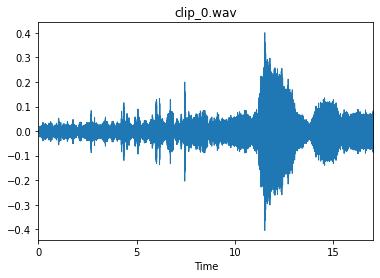

<Figure size 1080x288 with 0 Axes>

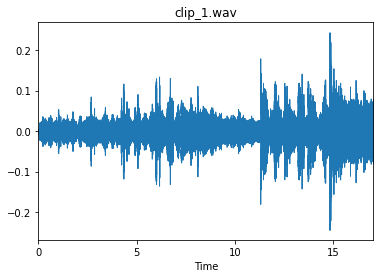

<Figure size 1080x288 with 0 Axes>

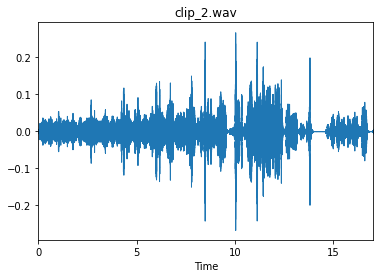

In [24]:
#@markdown **Visualize Clips**
def plot_waveform(input):
      filename = project_dir + input
      plt.figure(figsize=(15,4)) 
      data1,sample_rate1 = librosa.load(filename, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best') 
      fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
      librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0, x_axis='time',offset=0.0, max_sr=1000)
      ax.set(title=input)
def plot_multiple_waveforms(inputs):
    for i in range(len(inputs)):
      plot_waveform(inputs[i])

waveforms = ["clip_0.wav","clip_1.wav","clip_2.wav"]
plot_multiple_waveforms(waveforms)

In [25]:
#@title **clip_0.wav Playback**
Audio('clip_0.wav')


In [28]:
#@title **clip_1.wav Playback**
Audio('clip_1.wav')
  

In [ ]:
#@title **clip_2.wav Playback**
Audio('clip_2.wav')

#**Audio Finalization / Upsampling**

In [ ]:
upsample > de-noise > recursive so people can spend n amount of hours refining samples